# **Computer Vision Systems Homework**

Hi all!

In the spirit of #StayAtHome I tried to assemble a homework project without leaving the house. So, if this looks a little DIY, that's why. So without further ado:

## **Welcome to Cactusville!**

Cactusville is a small town populated by - you guessed correcty - cacti. Since it is a rapidly developing village, they are considering to use self-driving vehicles in their hometown. Your job as a computer vision maestro is to develop the required detection methods.

## The setting

Cactusville is quite unique in the sense that the entire surface of the town is covered in blue tablecloth. The exact colour and pattern of the cloth may vary slightly.

By-and large there are 3 different objects of interest:

* **Cacti:** These are the inhabitants of the village, so self-driving cars must be able to detect them to avoid hitting a cactus. Cacti have four basic sub-types: ***Happy***, ***Sad***, ***Angry*** and ***Evil***
* **Vehicles:** These are other vechiles you should also avoid colliding with. There are 3 vehicles in Cactusville: An ***SUV***, a ***truck***, and an ***airplane***.
* **Traffic Signs:** There are several signs placed all around the town, often multiple ones on a single stand. There are 55 different traffic sign classes, which are not listed here for the sake of brevity.

## Tasks

The people of Cactusville provided 4 videos for you to develop your algorithms with. Each video consists of several RGB and corresponding depth frames, which are found in the '*rgb*' and '*depth*' subfolders of the video. They are ordered numerically. The depth image is a single-channel, 16-bit image, where the pixel value is the distance of that pixel from the camera in **mm**.

The videos also contain a **calibration.yaml** file, which contains the intrinsic parameters of the camera. These are the same for all videos used, so feel free to hardcode the important values into your program.

Your team has to complete the following tasks:

1.   **Traditional Vision:** Create an algorithm to accurately detect and classify the 3 objects of interest (Cactus, Vehicle, Traffic Sign). You don't have to determine the subclass at this point.
2.   **Deep Learning:** Use a deep learning algorithm to classify traffic signs. The package provided includes a training and validation database of 32x32 RGB images.
3.   **3D Vision:** Determine the 3D positions of the object of interest relative to the camera. Use the center of an object's bounding box to determine the position on the image.

## Hardcore Tasks

There are also 3 hardcore tasks for those who like challenges. These aren't particularly difficult, but they take more work and require you to go a little bit beyond the scope of the practicals.

1.   **Traditional Vision:** Determine the subclasses of Cacti and Vehicles
2.   **Deep Learning:** Of the 55 possible traffic signs, 3 are missing from the training and test datasets. ('*X - Priority*', '*X - Turn left*', '*X - Turn right*') As a result, the neural net trained in task 2 will not be able to classify them properly. Extend your neural network to classify these as well.
3.   **3D Vision:** Determine the absolute pose (4x4 transformation matrix) of the camera as it moves throughout the video. You can safely assume that the pose in the first frame of every video is the identity matrix.

## Evaluation and Score

The basic package also contains annotations (correct answers) in the file **annotations.pickle** and a small python script **evaluate.py** you can use to measure the performance of your algorithm. 

Your homework score will be computed using the same script, albeit on 2 secret videos that you were not provided. The reason for this is to make sure that your algorithm works in new situations as well. The secret videos use the same 2 tablecloths and 3 vehicles, but the traffic signs and the cacti may be different. Not to mention the illumination.

The tasks will be evaluated using the following metrics:

* Task 1 - **Average Precision** (AP): This metric is simply the average of **Recall** (nCorrect / nObject) and **Precision** (nCorrect / nPrediction).
* Tasks 1 HC, 2 and 2 HC - **Classification accuracy**
* Tasks 3 and 3 HC - **RBF error**: This is simple the squared error between the prediction and the correct answer transformed by an RBF (Radial Basis Function) kernel. This means that a perfect answer has a score of 1, a bad answer will result in a score close to 0.

### **Answer format**

The evaluation function takes a single argument: A dictionary that containes your predictions. On the top level this dictionary should look like this:

```python
myAnswers = {
    'video1/rgb/1.jpg' : <<Predictions for the image>>,
    'video1/rgb/2.jpg' : <<Predictions for the image>>,
    ...
    'video4/rgb/10.jpg' : <<Predictions for the image>>,
}
```
It is important that the dictionary key contains the video path, since two videos might have image files with the same name. Also, include all images from all videos in the file (even if you have no predictions), since the evaluation function will look for them! The order of the images does not matter.

A prediction for a single image should also be a dictionary with the following format:
```python
myPred = {
    'poses' : [t_11, t12_, t_13, t_14, ..., t_33, t_34],
    'objects' : [obj_1, obj_2, ... obj_n]
}
```
The key `poses` contains the first three rows of the transformation matrix (the fourth row is always `[0 0 0 1]`). The key `objects` is a list, each element containing a single object prediction. The order of predictions does not matter. A single object prediction is also a list, containing the following elements:
```python
myObjects = [u, v, w, h, classInd, subClassInd, x, y, z]
```

* `(u, v)` are the center coordinates of the object's bounding box, while `(w, h)` are the width and height parameters. All four are expected in pixels @640x480 resolution.
* `(x, y, z)` are the 3D coordinates of the object relative to the camera. They are expected in **meters**.
* `classInd` is the index of the object class in the list `className` (see below). It is between 0 and 2.
* `subClassInd` is the index of the subclass in the appropriate list in `subclassNames` (again, see below). It is between [0-54] for traffic signs, [0-2] for vehicles and [0-3] for cacti.

## Rules

Here are some important rules and guidelines you have to follow:

*   This work is to be done in groups of 3 or 4 people. You can do it with less if you feel confident, but not more.
*   Forming/finding a group is your job. Once you have one, 1 person from the group shold write me a message on teams with the names and neptun codes of the members.
*   If you can't find a group by Sunday, write me and I'll formulate groups with the remaining people.
*   The deadline for the submission is Friday midnight on the 14th week. You can make a late submission until the next Sunday midnight.
*   You can opt out of the homework. In this case you will beed to take the midterm exam. This will be done via teams video chat (oral exam). If you want to take this option, write me a message by Sunday.
*   To pass the homework, you will have to submit a working solution for the 3 basic tasks. The quality of your predictions has to be significantly better than what is achievable by random guessing.

### Offered final grade

To qualify for the offered final grade (and to skip the exams), you have to complete at least one of the hardcore tasks. What this final grade will be depends on the quality of the predictions. 

I cannot specify the criteria exactly at this time, since I don't know how easy/hard this homework is yet. I will, however adhere to the following guidelines:

*   I'm planning to offer Good (4) and Excellent (5) final grades.
*   Those, who completed all 3 hardcore tasks with high quality are gonna get a 5
*   Those, who completed at least 2 hardcore tasks with high quality are gonna get **at least** a 4
*   'High quality' is undefined to create a situation in which teams compete
*   Also, I want to avoid two situations: a., where the criterion is so hard that only a few people manage to get an offered grade; and b., where it is so easy that everyone gets one.
*   My goal is that about 40-50% of all students would get an offered grade, 15-20% getting 5, and 25-30% getting 4. These goals are might change if way more people opt out of homework than I expect.

### Ethics

Copying entire solutions from online sources or each other is plagiarism, and it will be checked using automated tools. There are things that are perfectly okay, such as:
*   Copying small snippets (a few lines) from the OpenCV/PyTorch tutorials or stackoverflow, etc.
*   Appropriating code from the practicals (you can copy the entire thing), especially the deep learning one.
*   Since what is okay and what isn't is a bit subjective, if you are unsure, ask me.

## So, how should we do this?

So, how can you do this homework, especially if you haven't done things like this before? Here are a few tips:

### Environment

For development IDE the easiest is to just use Google Colab. To do this you just have to solve the homework inside this notebook. This is the simplest solution, although it has one drawback: the colab notebook has limited debugging capabilities.

If you want something more powerful, I recommend the [PyCharm](https://www.jetbrains.com/pycharm/) IDE, which is a free and pretty powerful Python development tool.

If you are planning to use PyCharm on Windows, you need to install a Python distribution, since Windows still doesn't come with one (it's 20 effing 20, Microsoft!). I recommend [Anaconda](https://www.anaconda.com/distribution/). Make sure you use Python 3.x and not 2.7.

[Here's a tutorial on how to set it up.](https://www.youtube.com/watch?v=e53lRPmWrMI)

### Collaboration within the team

Since I would strongly discourage teams to collaborate physically in the current situation, I would recommend some methods for remote collaboration.

* First of all, use Teams or similar methods to communicate.
* Second, use git or a similar version control tool to handle multiple team members working on the same project. 
* I strongly recommend creating a private repository for your homework on [Github](https://github.com/) (since you can add exactly 3 collaborators - including you that's a 4 person team). There, you can also create issues and other nice-to-have features to track you development. Getting some experience with version control is an absolute must for any engineer anyways.

Here's a tutorial for git for those who never used something like this before.

To use git from a GUI, I recommend [SmartGit](https://www.syntevo.com/smartgit/) or [Git Extensions](http://gitextensions.github.io/).

**ProTip:** If you use a Colab notebook, make sure to clear the output cells (especially figures and images) before you commit. Otherwise you'll litter in your repository.

[Here is an introduction to git](https://www.freecodecamp.org/news/learn-the-basics-of-git-in-under-10-minutes-da548267cc91/)

### Making a submission

You can make a submission at the appropriate page in the edu portal. The results and leaderboard will also be published here. The results are evaluated around 8pm (CET), so it's pointless to make multiple submission per day.

**Note**: Your submission should be runnable from Colab or PyCharm (if you used any custom libraries, please note it), and it must include the trained neural network model file from task 2. Also, make sure that only the code required for evaluation is ran (you can use a control variable to skip training code).

### Further resources

[Python tutorials](https://docs.python.org/3/tutorial/)

[OpenCV tutorials](https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_tutorials.html)

[PyTorch tutorials](https://pytorch.org/tutorials/)




# Solution
## Download dataset

In [0]:
# Homework dataset
!wget http://deeplearning.iit.bme.hu/CVS/HW.zip
!unzip -qq HW.zip
!rm HW.zip

# Traffic Sign Classification set
!wget http://deeplearning.iit.bme.hu/CVS/trafficSignsHW.zip
!unzip -qq trafficSignsHW.zip
!rm trafficSignsHW.zip

## Folder example

Get all subfolders in a directory

```
import os
myFolderList = [f.path for f in os.scandir(path) if f.is_dir()]
```

Get all files with extension in a directory

```
import glob
import re

def sorted_nicely( l ):
    """ Sort the given iterable in the way that humans expect."""
    convert = lambda text: int(text) if text.isdigit() else text
    alphanum_key = lambda key: [ convert(c) for c in re.split('([0-9]+)', key) ]
    return sorted(l, key = alphanum_key)

names = sorted_nicely(glob.glob1(path, "*.extension"))
```

### Class names


In [0]:
classNames = ['traffic sign', 'vehicle', 'cactus']
subclassNames = [
    ['Bump', 'Bumpy road', 'Bus stop', 'Children', 'Crossing (blue)', 'Crossing (red)', 'Cyclists',
     'Danger (other)', 'Dangerous left turn', 'Dangerous right turn', 'Give way', 'Go ahead', 'Go ahead or left',
     'Go ahead or right', 'Go around either way', 'Go around left', 'Go around right', 'Intersection', 'Limit 100',
     'Limit 120', 'Limit 20', 'Limit 30', 'Limit 50', 'Limit 60', 'Limit 70', 'Limit 80', 'Limit 80 over',
     'Limit over', 'Main road', 'Main road over', 'Multiple dangerous turns', 'Narrow road (left)',
     'Narrow road (right)', 'No entry', 'No entry (both directions)', 'No entry (truck)', 'No stopping', 'No takeover',
     'No takeover (truck)', 'No takeover (truck) end', 'No takeover end', 'No waiting', 'One way road',
     'Parking', 'Road works', 'Roundabout', 'Slippery road', 'Stop', 'Traffic light', 'Train crossing',
     'Train crossing (no barrier)', 'Wild animals', 'X - Priority', 'X - Turn left', 'X - Turn right'],
    ['SUV','truck','plane'],
    ['happy','sad','angry','evil']
]

### Display the first images

In [0]:

colors = [(0,0,255),(255,0,255),(0,255,0)]

def drawBBs(BBs, img):
    img = cv2.resize(img, (1280, 960))
    for BB in BBs:
        u = BB[0]*2
        v = BB[1]*2
        w = BB[2]*2
        h = BB[3]*2
        c = BB[4]
        sc = BB[5]
        x = BB[6]
        y = BB[7]
        z = BB[8]
        s = (u - w // 2, v - h // 2)
        e = (u + w // 2, v + h // 2)
        cv2.rectangle(img, s, e, colors[c], 1)
        tl = (s[0], s[1]+15)
        bl = (s[0], e[1]-5)
        cv2.putText(img,subclassNames[c][sc],tl,cv2.FONT_HERSHEY_COMPLEX_SMALL,0.75,colors[c])
        coords = "(%.2f, %.2f, %.2f)" % (x,y,z)
        cv2.putText(img,coords,bl,cv2.FONT_HERSHEY_COMPLEX_SMALL,0.65,colors[c])
    
    return img

import pickle
import cv2
import matplotlib.pyplot as plt
#This way it doesn't try to open a window un the GUI - works in python notebook
%matplotlib inline

# Read images
img = cv2.imread("HW/g1/rgb/1.jpg")
depth = cv2.imread("HW/g1/depth/1.png", -1)

# Read annotations
file = open('HW/annotations.pickle','rb')
annotations = pickle.load(file)

# Visualization
depth = depth / 5000.0
img = drawBBs(annotations["HW/g1/rgb/1.jpg"]["objects"], img)
img_rgb = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

# Figure with subplots
plt.figure(figsize=(30,30))
plt.subplot(1,2,1)
plt.imshow(img_rgb)
plt.subplot(1,2,2)
plt.imshow(depth,cmap='gray')

# Your Work

## Chores: Clone project repository, and Import libs, assets

In [2]:
!rm -rf *
!git clone https://github.com/Moda007/CVS_HW.git

Cloning into 'CVS_HW'...
remote: Enumerating objects: 19, done.
remote: Counting objects: 100% (19/19), done.
remote: Compressing objects: 100% (17/17), done.
remote: Total 19 (delta 3), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (19/19), done.


In [0]:
# import libraries
import os
import glob
import re
import pickle

from PIL import Image
import cv2
from google.colab.patches import cv2_imshow


import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

import numpy as np
import random
from sklearn.cluster import KMeans

In [0]:
# import DL libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten

import keras
from numpy import loadtxt
from keras.models import load_model
from sklearn.model_selection import train_test_split

In [0]:
# import assets
Traffic_Signs_Folder_Path = '/content/trafficSignsHW/'
DL_MODEL_2_PATH = '/content/CVS_HW/model_task02.h5'
DL_MODEL_2HC_PATH = '/content/CVS_HW/model_task04.h5'

!wget http://deeplearning.iit.bme.hu/CVS/HW.zip
!unzip -qq HW.zip
!rm HW.zip

# Traffic Sign Classification set
!wget http://deeplearning.iit.bme.hu/CVS/trafficSignsHW.zip
!unzip -qq trafficSignsHW.zip
!rm trafficSignsHW.zip

In [1]:
# Traffic Sign Classification set
!wget http://deeplearning.iit.bme.hu/CVS/trafficSignsHW.zip
!unzip -qq trafficSignsHW.zip
!rm trafficSignsHW.zip

--2020-05-21 13:34:44--  http://deeplearning.iit.bme.hu/CVS/trafficSignsHW.zip
Resolving deeplearning.iit.bme.hu (deeplearning.iit.bme.hu)... 152.66.243.112
Connecting to deeplearning.iit.bme.hu (deeplearning.iit.bme.hu)|152.66.243.112|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 175675617 (168M) [application/zip]
Saving to: ‘trafficSignsHW.zip’

trafficSignsHW.zip  100%[===================>] 167.54M  12.8MB/s    in 15s     

2020-05-21 13:35:03 (11.5 MB/s) - ‘trafficSignsHW.zip’ saved [175675617/175675617]



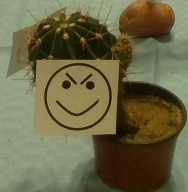

In [4]:
import cv2
from google.colab.patches import cv2_imshow
cv2_imshow(cv2.imread('/content/CVS_HW/0_3_evil.jpg'))

## Sub-functions

### Asset processing

In [0]:
base_path = "/content"
videos_path = "HW"

In [0]:
def sort_names_nicely(names):
    """ Sort the given iterable in the way that humans expect."""
    convert = lambda text: int(text) if text.isdigit() else text
    alphanum_key = lambda key: [ convert(c) for c in re.split('([0-9]+)', key) ]
    return sorted(names, key = alphanum_key)

In [0]:
def get_folders_to_predict():
  """ Get main folder for all videos to be processed."""
  folder_paths = ['/content/HW/g1'] # mock line
  path = base_path + '/' + videos_path
  
  # folder_paths = [f.path for f in os.scandir(path) if f.is_dir()]
  return folder_paths

In [0]:
def get_img_seq_nr(path):
  """ Get sorted list of image sequence numbers/file names without extension."""
  seqs = [os.path.basename(file)[:-4] for file in glob.glob(path + '/**/*.jpg')]
  seqs_sorted = sort_names_nicely(seqs)
  return seqs_sorted

### Object processing

In [0]:
def predict_objects_in_video(video_path):
  images = ["1","159"] # mock line
  # images = get_img_seq_nr(video_path)
  objects_in_video = {}
  visualized_list = []

  for image in images:
    path_len = len(base_path) # path position for extracting image key
    img_key = video_path[path_len+1:] + "/" + "rgb/" + image + ".jpg"
    img_path = video_path + "/" + "rgb/" + image + ".jpg"
    img_depth_path = video_path + "/" + "depth/" + image + ".png"

    img_orig = cv2.imread(img_path)
    img_orig_depth = cv2.imread(img_depth_path,-1)
    print(img_depth_path)

    objects_in_image, image_proc_steps = predict_objects_in_image(img_orig, img_orig_depth)
    objects_in_video[img_key] = objects_in_image
    visualized_list.append(image_proc_steps)

  return objects_in_video, visualized_list

In [0]:
def predict_objects_in_image(rgb_img, depth_img):
  """ Get predictions for a single image based on the colored and the depth image."""
  poses = [1.0,0.0,0.0,-0.0,0.0,1.0,0.0,-0.0,0.0,0.0,1.0,-0.0]
  objects, image_proc_steps = detect_objects_in_image(rgb_img, depth_img) # [u, v, w, h, classInd, subClassInd, x, y, z, leftTopX, leftTopY]
  object_list = []

  for obj in objects:
    cropped_obj, cropped_img_wo_bg = crop_obj(rgb_img.copy(), image_proc_steps[3].copy(), obj)
    # cv2_imshow(cropped_img_wo_bg)
    obj['classInd'] = classify_ooi(cropped_img_wo_bg)
    obj.pop('leftTopX')
    obj.pop('leftTopY')

    if obj['classInd'] != 0:
      obj['subClassInd'] = detect_vehicles_cactus_subclass(cropped_obj, obj['classInd'])
      obj['x'], obj['y'], obj['z'] = get_camera_coords(depth_img, obj['u'], obj['v'])
      obj_to_append = list(obj.values())
    else:
      obj_to_append = traffic_signs(cropped_obj)
    
    object_list.append(obj_to_append)

  prediction = { 'poses' : poses, 'objects' : object_list }

  return prediction, image_proc_steps

In [0]:
def crop_obj(img, eroded_img, obj_param):
  """ crop objects out from the original image depending on thier parameters."""
  leftTopX = obj_param['leftTopX']
  leftTopY = obj_param['leftTopY']
  w = obj_param['w']
  h = obj_param['h']

  w0 = leftTopX
  w1 = leftTopX + w
  h0 = leftTopY
  h1 = leftTopY + h

  cropped_img = img[h0:h1 , w0:w1]
  cropped_eroded_img = eroded_img[h0:h1 , w0:w1]

  black_pixels_mask = np.any(cropped_eroded_img != [0, 0, 0], axis=-1)  
  cropped_img_wo_bg = cropped_img.copy()
  cropped_img_wo_bg[black_pixels_mask] = [0,0,0]
  # cv2_imshow(cropped_img)
  # cv2_imshow(cropped_eroded_img)
  # cv2_imshow(cropped_img_wo_bg)

  return cropped_img, cropped_img_wo_bg

### 1 Traditional vision
>Create an algorithm to accurately detect and classify the 3 objects of interest (Cactus, Vehicle, Traffic Sign).



In [0]:
def detect_objects_in_image(rgb_img, depth_img):
  """ Get bounding boxes/rectangles for objects."""
  image_proc_steps = []
  # ============================================================================
  # Create clustered depth image >> Identify background wall
  # Input: depth_img
  # Output: depth_clustered
  # ============================================================================
  depth_div = depth_img.copy()/255
  depth_norm = depth_div.reshape(depth_div.shape[0]*depth_div.shape[1], -1)

  kmeans = KMeans(n_clusters=2, random_state=1).fit(depth_norm)
  clustered = kmeans.cluster_centers_[kmeans.labels_]
  depth_clusters = clustered.reshape(depth_div.shape[0], depth_div.shape[1], -1)
  depth_clustered = depth_clusters.reshape(depth_div.shape[0], depth_div.shape[1])
  image_proc_steps.append(depth_clustered)

  # ============================================================================
  # Create threshold for potential tableclothes >> Identify floor
  # Input: rgb_img
  # Output: floor_removed
  # ============================================================================

  shifted_img = cv2.pyrMeanShiftFiltering(rgb_img.copy(), 21, 51) # 21, 51
  shifted_img_gray = cv2.cvtColor(shifted_img, cv2.COLOR_BGR2GRAY)
  floor_removed = cv2.threshold(shifted_img_gray, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]
  image_proc_steps.append(floor_removed)

  # ============================================================================
  # Remove background and floor >> Get only the interesting areas on the img
  # Input: depth_img, rgb_img, depth_clustered
  # Output: interesting_spots
  # ============================================================================
  orig_depth=depth_img.copy()
  interesting_spots=rgb_img.copy()

  thr = np.unique(depth_clustered*255)[0]
  for row in range(orig_depth.shape[0]):
    row_stats={}
    no_zero = np.asarray([i for i in orig_depth[row] if i != 0])
    row_stats['mean']=no_zero.mean()
    thresh=row_stats['mean']
    for col in range(orig_depth.shape[1]-1, -1, -1):
      if(orig_depth[row][col]>thresh or orig_depth[row][col] == 0 or depth_clustered[row][col]*255 > thr or floor_removed[row][col]==255):
        interesting_spots[row][col][0]=255
        interesting_spots[row][col][1]=255
        interesting_spots[row][col][2]=255
      else:
        interesting_spots[row][col][0]=0
        interesting_spots[row][col][1]=0
        interesting_spots[row][col][2]=0
  image_proc_steps.append(interesting_spots)

  # ============================================================================
  # Erode image >> Prepare for edge detection
  # Input: interesting_spots
  # Output: eroded_img_uint8
  # ============================================================================
  kernel = np.ones((3,3),np.uint8)
  to_be_eroded=interesting_spots.copy()
  eroded_img=cv2.erode(to_be_eroded,kernel,iterations = 7)
  eroded_img_uint8 = eroded_img.astype(np.uint8)
  image_proc_steps.append(eroded_img_uint8)

  # ============================================================================
  # Canny edge detection, Contour search >> Prepare for bounding box detection
  # Input: eroded_img_uint8
  # Output: img_edges, contours
  # ============================================================================
  to_be_cannied=cv2.cvtColor(eroded_img_uint8.copy(), cv2.COLOR_BGR2GRAY)
  img_edges = cv2.Canny(to_be_cannied,50,120)
  contours,hierarchy = cv2.findContours(img_edges, 1, 2)
  # contours,hierarchy = cv2.findContours(to_be_contoured,cv2.RETR_LIST,cv2.CHAIN_APPROX_NONE)
  # print(len(contours))
  image_proc_steps.append(img_edges)

  # ============================================================================
  # Get bounding boxes based on contours
  # Input: rgb_img, contours
  # Output: bounding_rects
  # ============================================================================
  pic_for_rects = rgb_img.copy()

  bounding_rects = []
  for cnt in contours:
    x,y,w,h = cv2.boundingRect(cnt)
    u=x+w//2
    v=y+h//2
    duplicate = is_duplicate(bounding_rects,u,v,w,h)
    if(w < 300 and w>32 and h > 32 and h <220 and not duplicate):
      rect = {"u":u,"v":v,"w":w,"h":h,"classInd":0,"subClassInd":0,"x":0,"y":0,"z":0,"leftTopX":x,"leftTopY":y}
      cv2.rectangle(pic_for_rects, (x, y), (x+w, y+h), (0,255,0), 2)
      bounding_rects.append(rect)
    # cv2.drawContours(pic_for_rects_cont, contours, -1, (0,255,0), 3)
  image_proc_steps.append(pic_for_rects)

  # bounding_rects = [{"u":129,"v":376,"w":183,"h":126,"classInd":0,"subClassInd":0,"x":0,"y":0,"z":0},
  #         {"u":595,"v":280,"w":87,"h":147,"classInd":0,"subClassInd":0,"x":0,"y":0,"z":0}]
  return bounding_rects, image_proc_steps

In [0]:
def is_duplicate(item_list, u,v,w,h):
  """ Remove duplicate rectangles in list based on u,v,w,h params"""
  for item in item_list:
    if(item["u"]==u and item["v"]==v and item["w"]==w and item["h"]==h):
      return True
  return False

In [0]:
def classify_ooi(obj_wo_bg):
  """ Classification of object of interests (Cacti, Vehicle, Traffic Sign)"""
  classNames = ['traffic sign', 'vehicle', 'cactus']
  frame = obj_wo_bg.copy()
  # Convert BGR to HSV
  hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
  count_red = 0
  count_yellow = 0
  res=hsv.copy()
  all_p = 0
  for row in range(res.shape[0]):
    for col in range(res.shape[1]):
      pixel_h = res[row][col][0]
      pixel_s = res[row][col][1]
      pixel_v = res[row][col][2]
      # s_in_range = pixel_s >= 20 and pixel_s <= 255
      s_in_range=True
      # v_in_range = pixel_v >= 50 and pixel_v <= 255
      v_in_range=pixel_v != 0
      if s_in_range and v_in_range:
        all_p += 1
        red01 = pixel_h >= 0 and pixel_h <= 11
        red02 = pixel_h >= 165 and pixel_h <= 180
        yellow = pixel_h >= 17 and pixel_h <= 38
        if red01 or red02:
          count_red += 1
        elif yellow:
          count_yellow += 1
  if((count_red + count_yellow) / all_p) > 0.5:
    obj_class = 1
  else:
    obj_class = 2
  # perc_red = count_red / all_p
  # perc_yellow = count_yellow / all_p
  
  return obj_class

### 1 Traditional vision - HC
>Create an algorithm to accurately detect and classify the 2 objects of interest (Cactus, Vehicle) into thier subclasses.

In [0]:
def detect_vehicles_cactus_subclass(obj_img, class_idx):
  subClass_idx = 10
  if class_idx == 1:
    subClass_idx = detect_vehicle_subClass(obj_img)
  elif class_idx == 2:
    subClass_idx = detect_cactus_subClass(obj_img)
  return subClass_idx

In [0]:
def detect_vehicle_subClass(obj_img):
  return 0

In [0]:
def detect_cactus_subClass(obj_img):
  return 0

###2 Deep learning
>Create a deep learning algorithm to classify traffic signs into 52 provided subclasses.

#### Fetching and preparing DL datasets (52 traffic sign classes)

In [0]:
def fetching_traffic_signs(dataType, extra = false):

  if extra:
    b, a, i = 55, 52, 52
    main_path = ''
  else:
    b, a, i = 52, 0, 0
    main_path = Traffic_Signs_Folder_Path

  sub_path = dataType + 'FULL/'

  x_data = np.array(list())
  y_data = np.array(list())
  for name in subclassNames[0][a : b]:
    imgs = glob.glob(main_path + sub_path + name + '/*.jpg')
    x = np.array([np.array(Image.open(fname)) for fname in imgs])
    y = np.full(len(imgs), i)
    i += 1
    if x_data.size == 0:
      x_data = x.copy()
      y_data = y.copy()
    else:
      x_data = np.vstack((x_train, x))
      y_data = np.hstack((y_train, y))
    

  return x_data, y_data

In [0]:
x_train, y_train = fetching_traffic_signs('train')
x_test, y_test = fetching_traffic_signs('test')

#### Converting labels class vectors to binary class matrix

In [0]:
y_train = tf.keras.utils.to_categorical(y_train, 52)
y_test = tf.keras.utils.to_categorical(y_test, 52)

#### Creating Valid DS ( 20 % out of Train DS)

In [0]:
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

In [0]:
x_train.shape, y_train.shape, x_valid.shape, y_valid.shape

#### Creating Function to create the Conv NN with MaxPooling and Dropout layers 

In [0]:
def createModel(input_shape):
    model = Sequential()
    model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=input_shape))
    model.add(Conv2D(32, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
 
    model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
 
    model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
 
    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(52, activation='softmax'))
     
    return model

#### Model Creating

In [0]:
opt = tf.keras.optimizers.RMSprop(lr=0.0001, decay=1e-6)

model_task02 = createModel(x_train.shape[1:])

model_task02.compile(loss='categorical_crossentropy',
                    optimizer=opt,
                    metrics=['accuracy'])

In [0]:
model_task02.summary()

#### Model Training for 50 Epochs

In [0]:
import time

start_time = time.time()

model_task02.fit(x_train, y_train,
          batch_size=32,
          epochs=50,
          validation_data=(x_valid, y_valid),
          shuffle=True)

elapsed_time = time.time() - start_time

print(elapsed_time)

#### Model Evaluation

In [0]:
scores = model_task02.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

#### Model Saving and Loading

In [0]:
# Save
# model_task02.save('/content/drive/My Drive/CV Project/py/Last Saved Models/model_task02.h5')
# print("Saved model to disk")

#Load
# model = tf.keras.models.load_model(DL_MODEL_2_PATH)

### 2 Deep learning - HC
>Extended the deep learning algorithm to classify traffic signs into 55 subclasses (additional three classes).

In [0]:
def detect_traffic_sign_subClass(obj_img):
  # Model Loading
  model = tf.keras.models.load_model(DL_MODEL_2HC_PATH)
  # Predicting
  prediction = model.predict(np.array([obj_img])).argmax()
  return prediction

#### Fetching and preparing DL datasets (52 traffic sign classes)

In [0]:
x_train, y_train = fetching_traffic_signs('train')
x_test, y_test = fetching_traffic_signs('test')

#### Fetching and preparing DL datasets (missing 3 traffic sign classes)

In [0]:
x_train_extra, y_train_extra = fetching_traffic_signs('train', extra = True)
x_test_extra, y_test_extra = fetching_traffic_signs('test', extra = True)

#### Preparing Complete DS

In [0]:
x_train = np.vstack((x_train, x_train_extra))
y_train = np.hstack((y_train, y_train_extra))
x_test = np.vstack((x_test, x_test_extra))
y_test = np.hstack((y_test, y_test_extra))

### 3 3D Vision

In [0]:
def get_camera_coords(depth_img, u, v):
  c_matrix = np.array([[606.0482177734375, 0, 314.42626953125, 0.],
                     [0, 604.9857788085938, 246.05038452148438, 0.],
                     [0, 0, 1., 0.],
                     [0., 0., 0., 1.]])

  coords = {}

  cX = c_matrix[0, 2]
  cY = c_matrix[1, 2]
  fX = c_matrix[0, 0]
  fY = c_matrix[1, 1]

  x = ((u - cX) * depth_img[v, u] / fX) / 1000
  y = ((v - cY) * depth_img[v, u] / fY) / -1000
  z = (depth_img[v, u]) /1000

  return x,y,z

In [0]:
from HW.evaluate import evaluate

#file = open('HW/annotations.pickle','rb')
#predictions = pickle.load(file)

evaluate(predictions)

## Main

In [0]:
def predict_cactusville_objects(paths):
  predictions = {}
  rect_img_in_video = []
  # paths=['/content/HW/g1', '/content/HW/g2', '/content/HW/g3', '/content/HW/g4']

  for video_path in paths:
    objects_in_video, processed_imgs_for_video = predict_objects_in_video(video_path)
    predictions.update(objects_in_video)
    rect_img_in_video.append(processed_imgs_for_video)

  return predictions, rect_img_in_video

In [0]:
paths = get_folders_to_predict()

In [0]:
cactusville_objects, rect_img_in_video = predict_cactusville_objects(paths)

with open(base_path + '/' + videos_path + '/cactusville_objects.pickle', 'wb') as handle:
    pickle.dump(cactusville_objects, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [0]:
plt.figure(figsize=(80,80))
i = 1
for img in rect_img_in_video[3]:
  for proc_step in img:
    plt.subplot(len(rect_img_in_video[0]),len(img),i)
    plt.imshow(proc_step)
    i+=1

plt.show()

# Evaluation

This snippet assumes that the contents of the downloaded zip file are in the HW folder, and that your predictions are in a dictionary called predictions that adheres to the format specified above

In [0]:
from HW.evaluate import evaluate

#file = open('HW/annotations.pickle','rb')
file = open('HW/cactusville_objects.pickle','rb')

predictions = pickle.load(file)

evaluate(predictions)